In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
#Download Mnist dataset via fetch_openml from sklearn
mnist = fetch_openml('mnist_784', data_home='datasets/mnist')

In [3]:
#Check dataset
mnist.data.shape

(70000, 784)

In [4]:
Z = np.c_[mnist.target, mnist.data]
Z[:,0]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
Z[:,1:]

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [18]:
#Create X and Y from data and labels
X = Z[:,1:]
Y = Z[:,0]

5


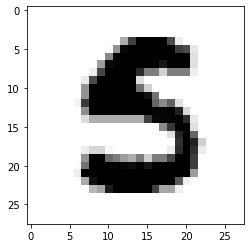

In [19]:
some_digit_index = 1997
X = X.astype(int)
print(Y[some_digit_index])
img = plt.imshow(X[some_digit_index].reshape(28, 28), cmap='gray_r')

In [21]:
#Training set
X_train = X[0:50000]
Y_train = Y[0:50000]

#Validation set
X_val = X[50000:60000]
Y_val = Y[50000:60000]

#Test set
X_test = X[60000:70000]
Y_test = Y[60000:70000]

In [22]:
#Training set has 50000 images of digits and 784 features
X_train.shape

(50000, 784)

In [23]:
#Metrics to evaluate models
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier